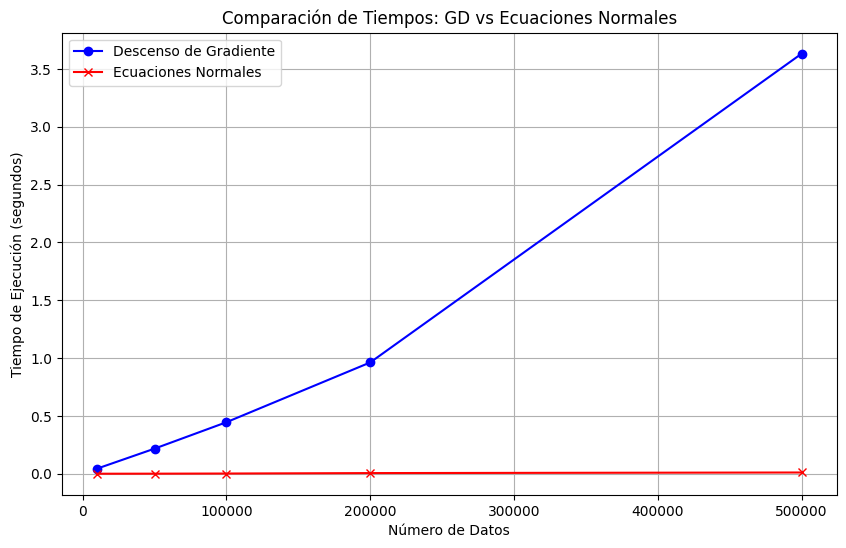

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Función de costo (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Implementación de GD
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    w_1 = 0.0  # Inicialización del peso (w_1)
    w_0 = 0.0  # Inicialización del sesgo (w_0)
    n = len(x)

    # Descenso del gradiente
    for epoch in range(epochs):
        y_pred = w_1 * x + w_0  # Predicción
        error = y - y_pred  # Error

        # Gradientes
        dw_1 = (-2/n) * np.sum(x * error)
        dw_0 = (-2/n) * np.sum(error)

        # Actualización de parámetros
        w_1 -= learning_rate * dw_1
        w_0 -= learning_rate * dw_0

    return w_1, w_0

# Implementación de Ecuaciones normales
def normal_equation(x, y):
    X = np.vstack([x, np.ones(len(x))]).T  # Añadir el término de sesgo (1s)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Solución de la ecuación normal
    return theta[0], theta[1]  # w_1, w_0

# Generar datos sintéticos
np.random.seed(0)
x_true = np.linspace(0, 10, 500000)  # Datos base para pruebas (gran cantidad de datos)

# Comparar los tiempos para diferentes tamaños de datos
sizes = [10000, 50000, 100000, 200000, 500000]  # Más grandes tamaños de datos
gd_times = []
ne_times = []

for size in sizes:
    x = np.linspace(0, 10, size)
    y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=x.shape)  # Agregar ruido

    # Tiempo de GD
    start_time = time.time()
    gradient_descent(x, y, learning_rate=0.01, epochs=1000)  # Más épocas para ver la diferencia
    gd_times.append(time.time() - start_time)

    # Tiempo de Ecuaciones Normales
    start_time = time.time()
    normal_equation(x, y)
    ne_times.append(time.time() - start_time)

# Gráficos: Comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(sizes, gd_times, label="Descenso de Gradiente", color='blue', marker='o')
plt.plot(sizes, ne_times, label="Ecuaciones Normales", color='red', marker='x')
plt.xlabel('Número de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos: GD vs Ecuaciones Normales')
plt.legend()
plt.grid(True)
plt.show()

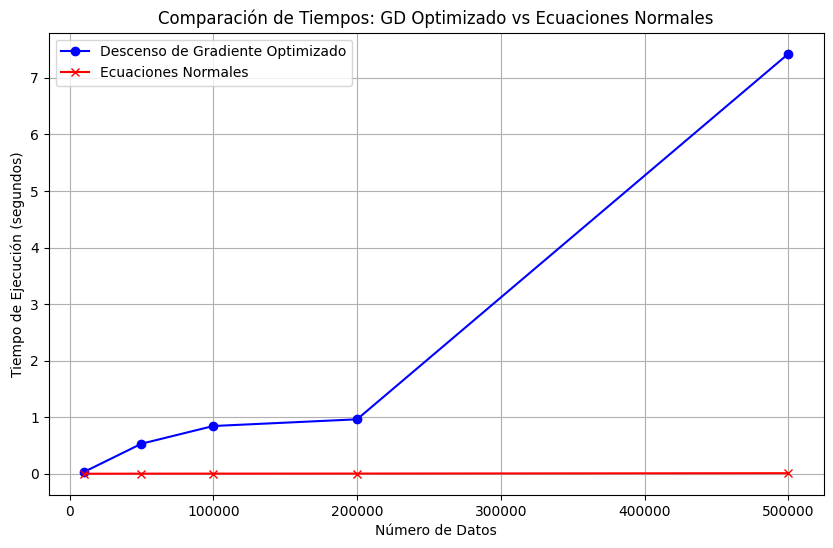

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Función de costo (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Implementación optimizada de GD con operaciones vectorizadas
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    w_1 = 0.0  # Inicialización del peso (w_1)
    w_0 = 0.0  # Inicialización del sesgo (w_0)
    n = len(x)

    # Operaciones vectorizadas para el descenso de gradiente
    for epoch in range(epochs):
        y_pred = w_1 * x + w_0  # Predicción
        error = y - y_pred  # Error

        # Gradientes (operaciones vectorizadas)
        dw_1 = (-2/n) * np.dot(x, error)
        dw_0 = (-2/n) * np.sum(error)

        # Actualización de parámetros
        w_1 -= learning_rate * dw_1
        w_0 -= learning_rate * dw_0

    return w_1, w_0

# Implementación de Ecuaciones normales
def normal_equation(x, y):
    X = np.vstack([x, np.ones(len(x))]).T  # Añadir el término de sesgo (1s)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Solución de la ecuación normal
    return theta[0], theta[1]  # w_1, w_0

# Generar datos sintéticos
np.random.seed(0)
x_true = np.linspace(0, 10, 500000)  # Datos base para pruebas (gran cantidad de datos)

# Comparar los tiempos para diferentes tamaños de datos
sizes = [10000, 50000, 100000, 200000, 500000]  # Más grandes tamaños de datos
gd_times = []
ne_times = []

for size in sizes:
    x = np.linspace(0, 10, size)
    y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=x.shape)  # Agregar ruido

    # Tiempo de GD optimizado
    start_time = time.time()
    gradient_descent(x, y, learning_rate=0.01, epochs=1000)  # Más épocas para ver la diferencia
    gd_times.append(time.time() - start_time)

    # Tiempo de Ecuaciones Normales
    start_time = time.time()
    normal_equation(x, y)
    ne_times.append(time.time() - start_time)

# Gráficos: Comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(sizes, gd_times, label="Descenso de Gradiente Optimizado", color='blue', marker='o')
plt.plot(sizes, ne_times, label="Ecuaciones Normales", color='red', marker='x')
plt.xlabel('Número de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos: GD Optimizado vs Ecuaciones Normales')
plt.legend()
plt.grid(True)
plt.show()

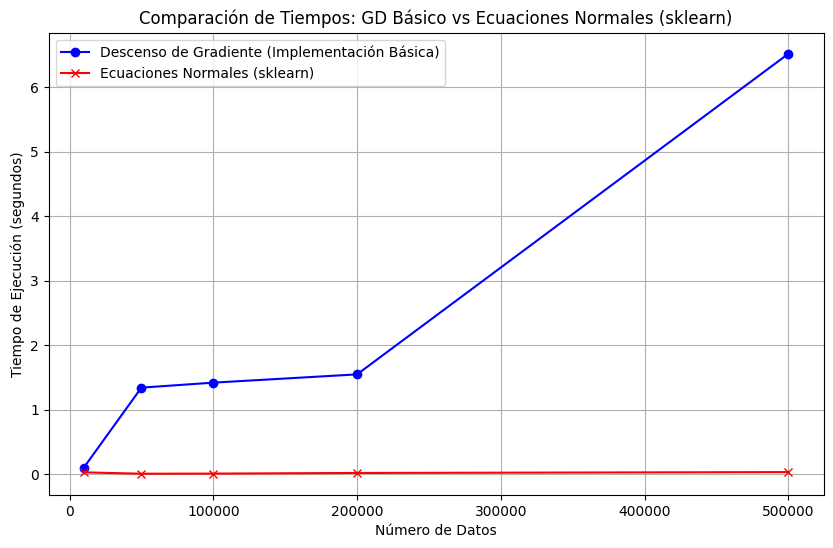

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generación de datos sintéticos
np.random.seed(0)
x_true = np.linspace(0, 10, 500000)  # Generar datos base grandes

# Comparar los tiempos para diferentes tamaños de datos
sizes = [10000, 50000, 100000, 200000, 500000]  # Diferentes tamaños de datos
gd_times = []
ne_times = []

# 2. Función para regresión por descenso de gradiente
def gradient_descent_sklearn(x, y, learning_rate=0.01, epochs=1000):
    w_1 = 0.0  # Inicialización del peso (w_1)
    w_0 = 0.0  # Inicialización del sesgo (w_0)
    n = len(x)

    for epoch in range(epochs):
        y_pred = w_1 * x + w_0  # Predicción
        error = y - y_pred  # Error

        # Gradientes
        dw_1 = (-2/n) * np.dot(x, error)
        dw_0 = (-2/n) * np.sum(error)

        # Actualización de parámetros
        w_1 -= learning_rate * dw_1
        w_0 -= learning_rate * dw_0

    return w_1, w_0

# 3. Comparar tiempos
for size in sizes:
    x = np.linspace(0, 10, size)
    y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=x.shape)  # Agregar ruido

    # Tiempo de GD usando sklearn (implementación optimizada)
    start_time = time.time()
    regressor = LinearRegression()
    regressor.fit(x.reshape(-1, 1), y)
    ne_times.append(time.time() - start_time)

    # Tiempo de Descenso de Gradiente
    start_time = time.time()
    gradient_descent_sklearn(x, y, learning_rate=0.01, epochs=1000)
    gd_times.append(time.time() - start_time)

# 4. Graficar los resultados de comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(sizes, gd_times, label="Descenso de Gradiente (Implementación Básica)", color='blue', marker='o')
plt.plot(sizes, ne_times, label="Ecuaciones Normales (sklearn)", color='red', marker='x')
plt.xlabel('Número de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos: GD Básico vs Ecuaciones Normales (sklearn)')
plt.legend()
plt.grid(True)
plt.show()

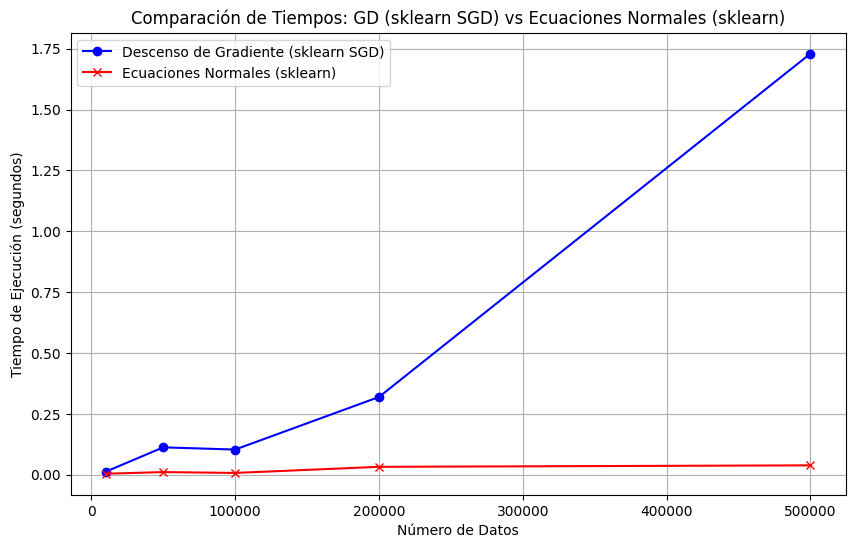

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor

# 1. Generación de datos sintéticos
np.random.seed(0)
x_true = np.linspace(0, 10, 500000)  # Generar datos base grandes

# Comparar los tiempos para diferentes tamaños de datos
sizes = [10000, 50000, 100000, 200000, 500000]  # Diferentes tamaños de datos
gd_times = []
ne_times = []

# 2. Función para regresión por descenso de gradiente (sklearn)
def gradient_descent_sklearn(x, y, learning_rate=0.01, epochs=1000):
    regressor = SGDRegressor(max_iter=epochs, learning_rate='constant', eta0=learning_rate)
    regressor.fit(x.reshape(-1, 1), y)
    return regressor.coef_[0], regressor.intercept_

# 3. Comparar tiempos
for size in sizes:
    x = np.linspace(0, 10, size)
    y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=x.shape)  # Agregar ruido

    # Tiempo de GD usando sklearn (implementación optimizada con SGDRegressor)
    start_time = time.time()
    gradient_descent_sklearn(x, y, learning_rate=0.01, epochs=1000)
    gd_times.append(time.time() - start_time)

    # Tiempo de Ecuaciones Normales usando sklearn
    start_time = time.time()
    regressor = LinearRegression()
    regressor.fit(x.reshape(-1, 1), y)
    ne_times.append(time.time() - start_time)

# 4. Graficar los resultados de comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(sizes, gd_times, label="Descenso de Gradiente (sklearn SGD)", color='blue', marker='o')
plt.plot(sizes, ne_times, label="Ecuaciones Normales (sklearn)", color='red', marker='x')
plt.xlabel('Número de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos: GD (sklearn SGD) vs Ecuaciones Normales (sklearn)')
plt.legend()
plt.grid(True)
plt.show()

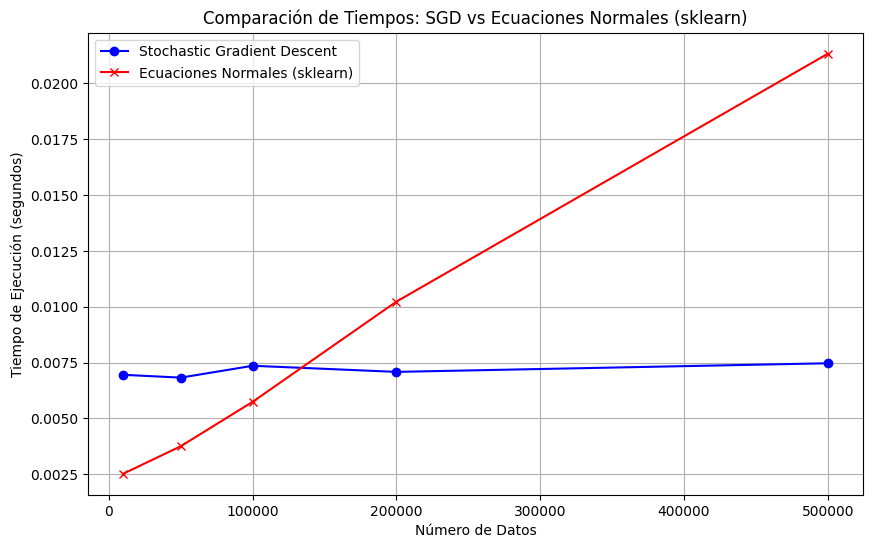

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generación de datos sintéticos
np.random.seed(0)
x_true = np.linspace(0, 10, 500000)  # Generar datos base grandes

# Comparar los tiempos para diferentes tamaños de datos
sizes = [10000, 50000, 100000, 200000, 500000]  # Diferentes tamaños de datos
sgd_times = []
ne_times = []

# 2. Función para regresión por Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    w_1 = 0.0  # Inicialización del peso (w_1)
    w_0 = 0.0  # Inicialización del sesgo (w_0)
    n = len(x)

    for epoch in range(epochs):
        # Elegir una muestra aleatoria (SGD)
        idx = np.random.randint(n)
        x_i = x[idx]
        y_i = y[idx]

        # Predicción
        y_pred = w_1 * x_i + w_0
        error = y_i - y_pred  # Error para la muestra

        # Gradientes
        dw_1 = -2 * x_i * error
        dw_0 = -2 * error

        # Actualización de parámetros
        w_1 -= learning_rate * dw_1
        w_0 -= learning_rate * dw_0

    return w_1, w_0

# 3. Comparar tiempos
for size in sizes:
    x = np.linspace(0, 10, size)
    y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=x.shape)  # Agregar ruido

    # Tiempo de SGD
    start_time = time.time()
    stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000)
    sgd_times.append(time.time() - start_time)

    # Tiempo de Ecuaciones Normales usando sklearn
    start_time = time.time()
    regressor = LinearRegression()
    regressor.fit(x.reshape(-1, 1), y)
    ne_times.append(time.time() - start_time)

# 4. Graficar los resultados de comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(sizes, sgd_times, label="Stochastic Gradient Descent", color='blue', marker='o')
plt.plot(sizes, ne_times, label="Ecuaciones Normales (sklearn)", color='red', marker='x')
plt.xlabel('Número de Datos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos: SGD vs Ecuaciones Normales (sklearn)')
plt.legend()
plt.grid(True)
plt.show()